# Advance Classification Exam

© Explore Data Science Academy

---
### Honour Code

I {**Ronewa Mutobvu**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.



. . .

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Evaluation</a>

<a href=#Nine>9. Conclusion</a>



 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>]


Every data scientist devotee has a wish to work on a cool project, isn’t it?  What’s cooler than working on specific domains like Natural Language Processing projects (NLP). NLP is a subfield of linguistics, Artificial intelligence, and computer science with the interactions between computers and human language. NLP domain consists of a whole lot of different projects one can tackle however in this project we will focus on one of the NLP amazing projects, the Language identification project. Language identification is an important project in NLP. It involves predicting the natural language of any text provided. It is vital to identify the language of the provided text before performing any other actions like translating it.
#### Exam Overview: South African Language Identification Hackathon
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written. The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

##### About the dataset

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt. The data is in the form Language ID, and Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data. 


Language IDs

* afr - Afrikaans

* eng - English

* nbl - isiNdebele

* nso - Sepedi

* sot - Sesotho

* ssw - siSwati

* tsn - Setswana

* tso - Xitsonga

* ven - Tshivenda

* xho - isiXhosa

* zul - isiZulu 



 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
In this section I have imported all necessary libraries that will be used throughout the analysis and modelling.

In [1]:
#imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re

# imports for data visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc, plot_confusion_matrix
%matplotlib inline
# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import StackingClassifier
# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import neattext.functions as nfx
import warnings
warnings.simplefilter('ignore')


<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section i have loaded the data from the `train`and `test` set csv files. |

In [2]:
# Importing the train & test data sets
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [3]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, I have performed in-depth analysis of all the variables in the DataFrame.

Now, lets look explore the data so we can get the sense of how our dataset looks like. I would be checking the for the shape of the data, datatype and statistics of the data and will also make use of the visuals to check for trends and pattern of the dataset.

In [4]:
train.shape

(33000, 2)

The dataset contains 33000 rows and 2 featues/ column.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


* This project only comprises of the objects, meaning all the features are categorical.
* The features contains are language id and text .

Looking at the information of the data, 

In [6]:
train['lang_id'].value_counts().count()

11

In [7]:
train['text']

0        umgaqo-siseko wenza amalungiselelo kumaziko ax...
1        i-dha iya kuba nobulumko bokubeka umsebenzi na...
2        the province of kwazulu-natal department of tr...
3        o netefatša gore o ba file dilo ka moka tše le...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, Length: 33000, dtype: object

In [8]:
train['text'].value_counts().count()

29948

In [9]:
train["lang_id"]

0        xho
1        xho
2        eng
3        nso
4        ven
        ... 
32995    tsn
32996    sot
32997    eng
32998    xho
32999    sot
Name: lang_id, Length: 33000, dtype: object

In [10]:
train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [11]:

train['stopwords'] = train['text'].apply(nfx.extract_stopwords)
train['special_char'] = train['text'].apply(nfx.extract_special_characters)




6.0
4.0


<AxesSubplot:ylabel='lang_id'>

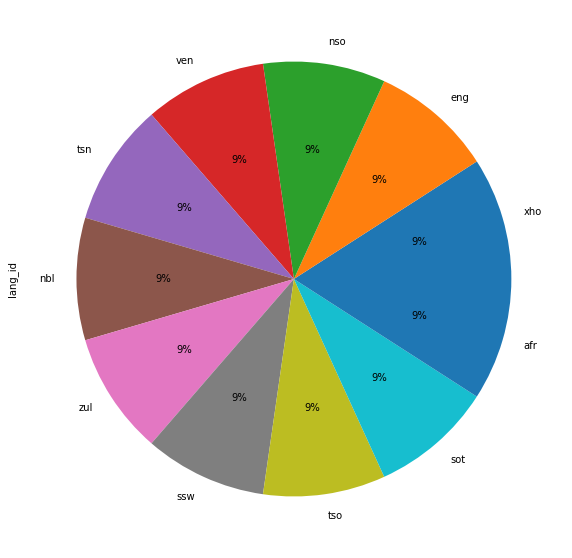

In [12]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 10
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
train.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

Looking at the plot above, we can infur that the dataset is balanced, meaning we do not have to perform resampling or any other method that deals with imbalanced dataset.
Resampling consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling)

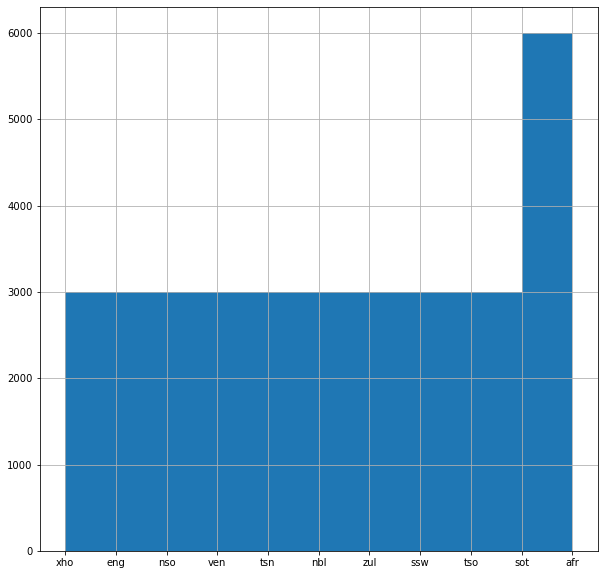

In [13]:
train['lang_id'].hist(figsize=(10,10));

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section I have performed preprocessing using neattext and countVectoriser. |

---

In [14]:
train['clean_hash'] = train['text'].apply(nfx.remove_special_characters)
train['clean_hash'] = train['clean_hash'].apply(nfx.remove_multiple_spaces)
train['clean_hash'] = train['clean_hash'].apply(nfx.remove_stopwords)
train['clean_hash'] = train['clean_hash'].apply(nfx.remove_numbers)
train['clean_hash'] = train['clean_hash'].apply(nfx.remove_punctuations)
train['clean_hash'] = train['clean_hash'].apply(nfx.remove_terms_in_bracket)



In [15]:
train['clean_hash']

0        umgaqosiseko wenza amalungiselelo kumaziko axh...
1        idha iya kuba nobulumko bokubeka umsebenzi nap...
2        province kwazulunatal department transport inv...
3        netefata gore ba file dilo ka moka te le dumel...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke tlisa boeteledip...
32996    modise mosadi na ntse sa utlwe hore thabang ra...
32997    closing date submission completed tenders augu...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha mang le ona lokela ho etsa ditlaleho t...
Name: clean_hash, Length: 33000, dtype: object

In [16]:
train

,lang_id,text,stopwords,special_char,clean_hash
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,[],[-],umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,[],"[-, -]",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,"[the, of, of, from, in, for, the, of, the, the...",[-],province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, o, a, a, a, a, a]","[š, š, š, š, š, š]",netefata gore ba file dilo ka moka te le dumel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,[i],[],khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,[],[š],popo ya dipolateforomo tse ke tlisa boeteledip...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,"[o, o, o, o, a, a, o, a]",[],modise mosadi na ntse sa utlwe hore thabang ra...
32997,eng,closing date for the submission of completed t...,"[for, the, of, is, at, no, will, be, be, in, a...",[],closing date submission completed tenders augu...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,[],[],nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [17]:
train['clean_hash'] = train['clean_hash'].str.lower()

In [18]:
betterVect = CountVectorizer(stop_words='english',
                             min_df=1,
                             max_df= 0.9,
                             ngram_range=(1,2))

In [19]:
X = betterVect.fit_transform(train['text'])

y = train['lang_id']

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, i have developed several classification models with their matrics.

## Classification Models

We will be looking at the following models:
 * Logistic Regression
 * Passive Aggression Classifier
 * Naive Bayes Classifiers
        - BernolliNB
        - MultinomialNB
        -ComplimentNB
 

## Splitting the data

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.01, random_state = 42, stratify=y)

## Model Training and Prediction

### Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
pred_lr = lr.predict(X_test)

### Complement Naive Bayes

In [23]:
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

ComplementNB(alpha=0.01)

In [24]:
pred_clf = clf.predict(X_test)

### MultinomialNB()

In [25]:
model = MultinomialNB(alpha = 0.1)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [26]:

pred_mn = model.predict(X_test)

### Passive Aggressive 

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [28]:
pred_pass_tf = pass_tf.predict(X_test)

### BernoulliNB model

In [29]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [30]:
pred_BNB = BNBmodel.predict(X_test)

## Ensemble Model Stacking

### Stacking Classifier

In [31]:
models = [("CLF",clf),("MN", model),]
meta_learner_reg = model
s_reg = StackingClassifier(estimators=models, final_estimator=meta_learner_reg)

In [32]:
s_reg.fit(X_train,y_train)
pred_stack = s_reg.predict(X_test)

 <a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, i have performed the matrics such as F1 score, Recall, Accuracy and precision 
---

### Logistic Regression

In [33]:
acc = accuracy_score(y_test, pred_lr)#metrics reporting
report = classification_report(y_test,pred_lr)

print("Accuracy is :",acc)
print('Classification Report')
print(classification_report(y_test,pred_lr))

Accuracy is : 1.0
Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        30
         eng       1.00      1.00      1.00        30
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        30
         sot       1.00      1.00      1.00        30
         ssw       1.00      1.00      1.00        30
         tsn       1.00      1.00      1.00        30
         tso       1.00      1.00      1.00        30
         ven       1.00      1.00      1.00        30
         xho       1.00      1.00      1.00        30
         zul       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [34]:
confusion_matrix(y_test, pred_lr)

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

### Multinomial Naive Bayes

In [35]:
acc = accuracy_score(y_test, pred_mn)#metrics reporting
report = classification_report(y_test,pred_mn)
print("Accuracy is :",acc)
print('Classification Report')
print(classification_report(y_test,pred_mn))

Accuracy is : 1.0
Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        30
         eng       1.00      1.00      1.00        30
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        30
         sot       1.00      1.00      1.00        30
         ssw       1.00      1.00      1.00        30
         tsn       1.00      1.00      1.00        30
         tso       1.00      1.00      1.00        30
         ven       1.00      1.00      1.00        30
         xho       1.00      1.00      1.00        30
         zul       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



### Compliment Naive Bayes

In [36]:
acc = accuracy_score(y_test, pred_clf)#metrics reporting
report = classification_report(y_test,pred_clf)
print("Accuracy is :",acc)
print('Classification Report')
print(classification_report(y_test,pred_clf))

Accuracy is : 0.996969696969697
Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        30
         eng       0.97      1.00      0.98        30
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        30
         sot       1.00      1.00      1.00        30
         ssw       1.00      1.00      1.00        30
         tsn       1.00      1.00      1.00        30
         tso       1.00      1.00      1.00        30
         ven       1.00      1.00      1.00        30
         xho       1.00      1.00      1.00        30
         zul       1.00      0.97      0.98        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



### Passive Aggressive 

In [37]:
acc = accuracy_score(y_test, pred_pass_tf)
report = classification_report(y_test,pred_pass_tf)
print("Accuracy is :",acc)
print('Classification Report')
print(classification_report(y_test,pred_pass_tf))

Accuracy is : 0.996969696969697
Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        30
         eng       1.00      1.00      1.00        30
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        30
         sot       0.97      1.00      0.98        30
         ssw       1.00      1.00      1.00        30
         tsn       1.00      0.97      0.98        30
         tso       1.00      1.00      1.00        30
         ven       1.00      1.00      1.00        30
         xho       1.00      1.00      1.00        30
         zul       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



### BernoulliNB Classifier

In [39]:
acc = accuracy_score(y_test, pred_BNB)#metrics reporting
report = classification_report(y_test,pred_BNB)
print("Accuracy is :",acc)
print('Classification Report')
print(classification_report(y_test,pred_BNB))

Accuracy is : 1.0
Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        30
         eng       1.00      1.00      1.00        30
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        30
         sot       1.00      1.00      1.00        30
         ssw       1.00      1.00      1.00        30
         tsn       1.00      1.00      1.00        30
         tso       1.00      1.00      1.00        30
         ven       1.00      1.00      1.00        30
         xho       1.00      1.00      1.00        30
         zul       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



### Ensemble Stacking

In [40]:
acc = accuracy_score(y_test, pred_stack)#metrics reporting
report = classification_report(y_test,pred_stack)
print("Accuracy is :",acc)
print('Classification Report')
print(classification_report(y_test,pred_stack))

Accuracy is : 1.0
Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        30
         eng       1.00      1.00      1.00        30
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        30
         sot       1.00      1.00      1.00        30
         ssw       1.00      1.00      1.00        30
         tsn       1.00      1.00      1.00        30
         tso       1.00      1.00      1.00        30
         ven       1.00      1.00      1.00        30
         xho       1.00      1.00      1.00        30
         zul       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



The logistic model took a long to fit the data using the default parameters and produced an accuracy of 1 of prediction on training set together with Multinormal Naive Bayes and bernoulliNB but took shorter time to fit the data and multinomial holds significant value of 0.1. i have stacked the Multinormial and complimentNB together and the accuracy showered that they performs better like the BernolliNB.

In the next section, all models were evaluated expect the stacked model.

<a id="eight"></a>
## 8. Model Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model evaluation ⚡ |
| :--------------------------- |
| Continuing with exaluating the models and checking the perfomance.

In [51]:
names = ['MultinomialNB', 'LogisticRegression', 'BernoulliNB','PassiveAggressiveClassifier', "ComplimentNB"]

In [52]:
classifiers = [
    MultinomialNB(alpha=0.1),
    LogisticRegression(),
    BernoulliNB(),
    PassiveAggressiveClassifier(),
    ComplementNB(alpha=0.01),
    ]

In [53]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    pred_clf = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train,pred_clf)
    precision = metrics.precision_score(y_train, pred_clf, average='weighted')
    recall    = metrics.recall_score(y_train, pred_clf, average='weighted')

    f1        = metrics.f1_score(y_train, pred_clf, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, pred_clf)
    class_report[name] = metrics.classification_report(y_train, pred_clf)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting MultinomialNB model...
... predicting
... scoring
Fitting LogisticRegression model...
... predicting
... scoring
Fitting BernoulliNB model...
... predicting
... scoring
Fitting PassiveAggressiveClassifier model...
... predicting
... scoring
Fitting ComplimentNB model...
... predicting
... scoring
... All done!


In [54]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
MultinomialNB,1.0,1.0,1.0,1.0,1.000000,0.579149
LogisticRegression,1.0,1.0,1.0,1.0,1.000000,173.842312
BernoulliNB,1.0,1.0,1.0,1.0,1.000000,0.509208
PassiveAggressiveClassifier,1.0,1.0,1.0,1.0,1.000000,2.317882
ComplimentNB,1.0,1.0,1.0,1.0,0.996969,0.527201


<AxesSubplot:xlabel='Classifier'>

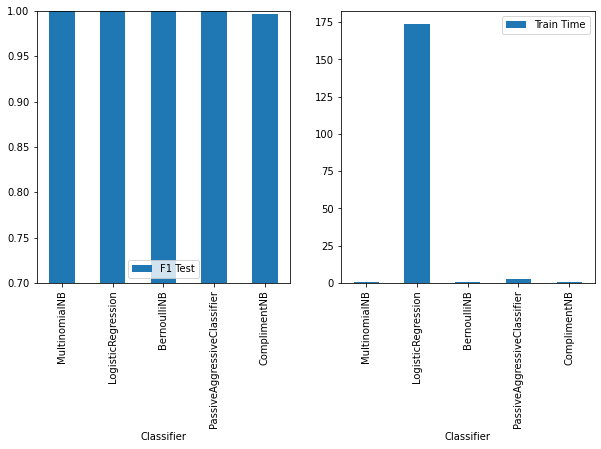

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.70,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

In [56]:
confusion['BernoulliNB']

array([[2970,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2970,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2970,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2970,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2970,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2970,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2970,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2970,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2970,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2970,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2970]],
      dtype=int64)

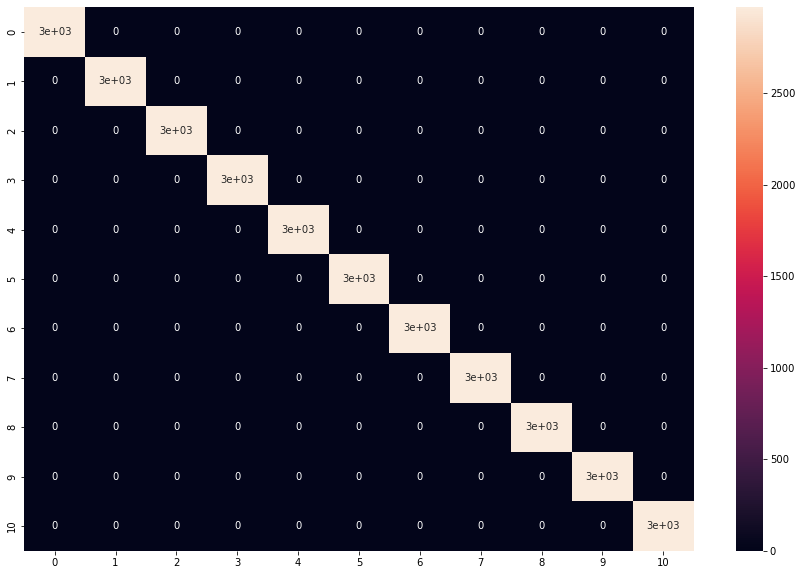

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion['BernoulliNB'], annot = True)
plt.show()

## predicting using the test dataset

In [58]:

x_test= betterVect.transform(test["text"])
pred_stacking = s_reg.predict(x_test)

## Kaggle Submission

In [59]:
lang_id = pd.DataFrame(pred_stacking, columns = ['lang_id'])
index = pd.DataFrame({'index': test['index']})
submission_test_data = index.join(lang_id)
submission_test_data.to_csv('output.csv', index = False)
submission_test_data


,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


<a id="eight"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

BernoulliNB, Logistic Regression and MultinomialNB appears to be performing better in language than the other ones since they all hold a higher accuracy score of 1.